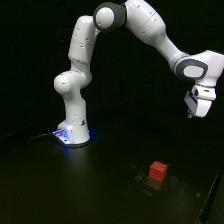

In [6]:
from PIL import Image
image_dir = "/home/marius/Projects/polymetis_franka/temp.jpg"
image = Image.open(image_dir).convert('RGB')
image

In [11]:
import os
import h5py

dataset_path = "/home/marius/Projects/polymetis_franka/data/0518_all/0518_redblock_100_blocking"
# dataset_path = "/home/marius/Projects/polymetis_franka/data/pick_red_cube_100_blocking"
dataset_path = "/home/marius/Projects/polymetis_franka/data/debug_mujoco_blocking"
file_name = "demos.hdf5"
f = h5py.File(os.path.join(dataset_path, file_name),'r+')
demo_keys = list(f["data"].keys())
f["data"][demo_keys[0]].keys(), f["data"][demo_keys[0]]["obs"].keys()

(<KeysViewHDF5 ['actions', 'dones', 'obs']>,
 <KeysViewHDF5 ['action', 'front_rgb', 'language_instruction', 'lowdim_ee', 'lowdim_qpos', 'obj_pose']>)

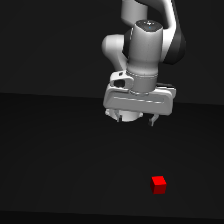

In [12]:
from PIL import Image

image = Image.fromarray(f["data"][demo_keys[0]]["obs"]["front_rgb"][0])
image

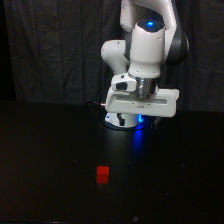

In [8]:
from PIL import Image

image = Image.fromarray(f["data"][demo_keys[0]]["obs"]["front_rgb"][0])
image

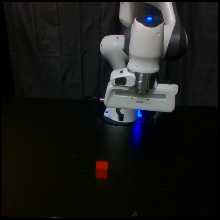

In [9]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.06)], p=0.3),
    transforms.RandomApply([transforms.RandomCrop(size=(216, 216)), transforms.Pad(padding=2)], p=0.3),
    # transforms.RandomApply([transforms.RandomAffine(degrees=5, shear=5)], p=0.3)
])

transformed_image = transform(image)

transformed_image

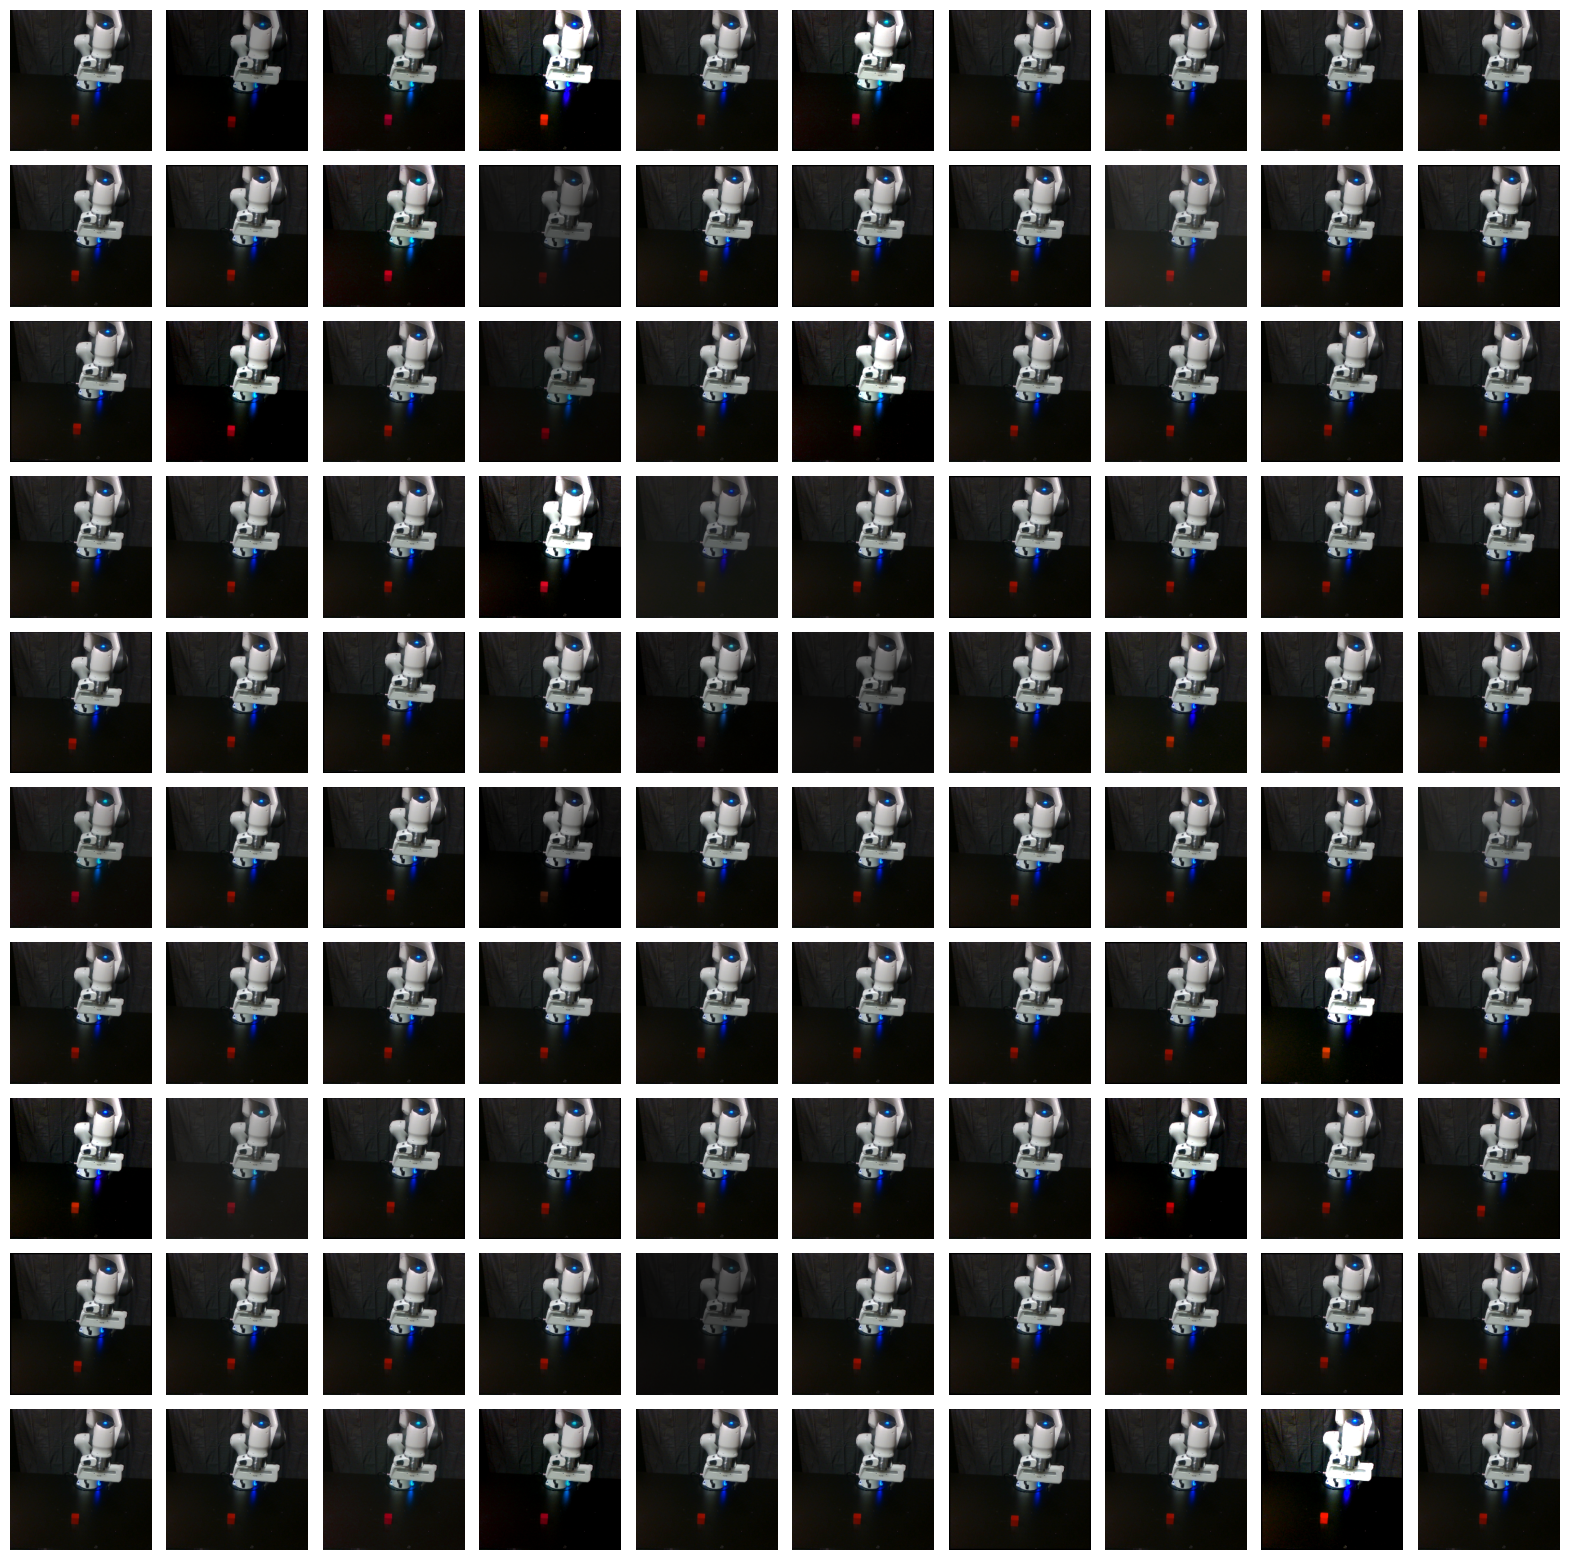

In [10]:
import matplotlib.pyplot as plt

# Apply the transformations 100 times
transformed_images = [transform(image) for _ in range(100)]

# Create a grid of images
fig, axes = plt.subplots(10, 10, figsize=(20, 20))

for ax, img in zip(axes.flatten(), transformed_images):
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()